# ANSUR II dataset

!["Ansur"](Ansur.png)

run in terminal :

```
pip install -r requirements.txt
```

import libraries :

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

read and show the head of dataset:

In [30]:
female = pd.read_csv("ANSUR II FEMALE Public.csv")
female.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [31]:
male = pd.read_csv("ANSUR II MALE Public.csv")
male.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [32]:
data = pd.concat([male,female])
data.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [ ]:
# convert inch to cm
data["Heightin"] = data["Heightin"] * 2.54

# convert pound to kg
data["Weightlbs"] =  data["Weightlbs"] * 0.453592

# convert Male and Female to 1 and 0
data["Gender"] = data["Gender"].replace(["Male","Female"],[1,0])


Show heights for women and men on same plot:

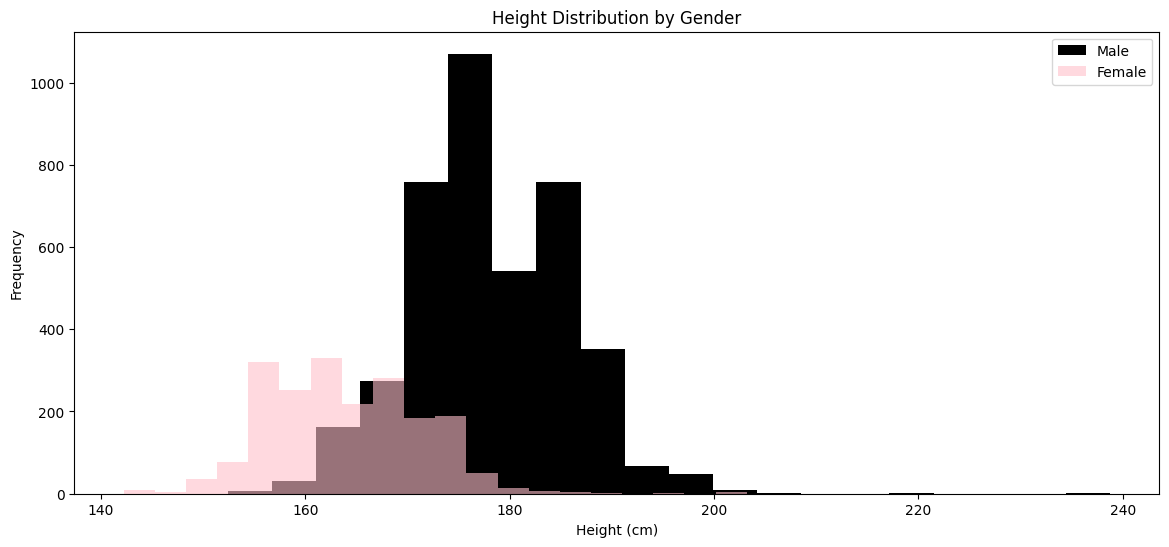

In [34]:
plt.figure(figsize=(14, 6))
plt.hist(data.query("Gender==1")["Heightin"], bins=20, color="black", label="Male")
plt.hist(data.query("Gender==0")["Heightin"], bins=20, color="pink", alpha=0.6, label="Female")
plt.title("Height Distribution by Gender")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Split dataset to train and test datasets (%80 for train and %20 for test):

In [35]:
from sklearn.model_selection import train_test_split


X = pd.DataFrame({"Heightin": data["Heightin"], "Weightlbs": data["Weightlbs"]})
y = data["Gender"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)



Evaluate your KNN algorithm on the test dataset with different values of k = 3, 5, 7, ... :

In [36]:

from mknn import KNN

for k in [3,5,7,9,11,13]:
    knn = KNN(k=k)
    knn.fit(X_train.values,y_train.values)
    knn.predict(X_test.values)
    score = knn.score(X_test.values, y_test.values)
    score = round((score*100),4)
    print(f"K={k} : {score}%")

K=3 : 86.2438%
K=5 : 86.2438%
K=7 : 86.7381%
K=9 : 86.6557%
K=11 : 86.8204%
K=13 : 87.1499%


result :

|   K   | percent  |     
|------|---|
| 3 |86.2438%|
| 5 |86.2438%|
| 7 |86.7381%|
| 9 |86.6557%|
| 11 |86.8204%|  
| 13 |87.1499%|    

Calculate confusion matrix for test dataset:

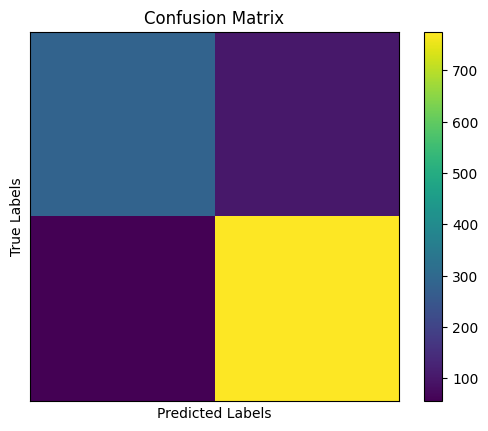

In [41]:
from sklearn.metrics import confusion_matrix


y_pred = knn.predict(X_test.values)

cm = confusion_matrix(y_test.values, y_pred)

plt.imshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()


Fit the scikit-learn KNN algorithm on the train dataset and 
Evaluate the scikit-learn KNN algorithm on the test dataset. Make sure your accuracy is equal to scikit-learn's accuracy :

In [47]:
from sklearn.neighbors import KNeighborsClassifier

for k in [3,5,7,9,11,13]:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    score = knn.score(X_test, y_test)
    score = round((score *100),4)
    print(f"K={k} : {score}%")


K=3 : 82.8666%
K=5 : 85.7496%
K=7 : 86.4086%
K=9 : 86.4086%
K=11 : 86.8204%
K=13 : 86.3262%


result :

|   K   | percent  |     
|------|---|
| 3 |82.8666%|
| 5 |85.7496%|
| 7 |86.4086%|
| 9 |86.4086%|
| 11 |86.8204%|  
| 13 |86.3262%|    

Calculate confusion matrix using scikit-learn:

c:\Users\ComputerKosar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


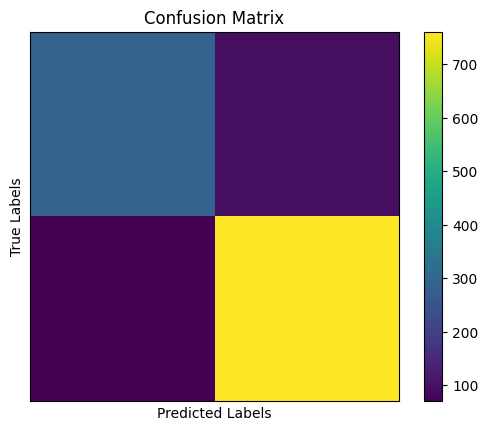

In [48]:

from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test.values)

cm = confusion_matrix(y_test.values, y_pred)

plt.imshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()